In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = torch.load(
    "/Users/mauriciomurillogonzales/Documents/VisionResearchLab/Diffusion_ClasSeg/classeg/extensions/Latent_Diffusion/model/Autoencoder_Checkpoint/model.ckpt",
    map_location="cpu",
)

In [3]:
print(model.keys())

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'callbacks', 'optimizer_states', 'lr_schedulers'])


In [4]:
from classeg.extensions.Latent_Diffusion.model.autoencoder.autoencoder import (
    VQModelInterface,
)
import yaml

with open(
    "/Users/mauriciomurillogonzales/Documents/VisionResearchLab/Diffusion_ClasSeg/classeg/extensions/Latent_Diffusion/model/autoencoder/auto_config.yaml",
    "r",
) as f:
    data = yaml.load(f, Loader=yaml.SafeLoader)
print(data)

{'model': {'base_learning_rate': 4.5e-06, 'target': 'ldm.models.autoencoder.VQModel', 'params': {'embed_dim': 4, 'n_embed': 256, 'monitor': 'val/rec_loss', 'ddconfig': {'double_z': False, 'z_channels': 4, 'resolution': 1024, 'in_channels': 3, 'out_ch': 3, 'ch': 128, 'ch_mult': [1, 2, 2, 4], 'num_res_blocks': 2, 'attn_resolutions': [32], 'dropout': 0.0}, 'lossconfig': {'target': 'taming.modules.losses.vqperceptual.VQLPIPSWithDiscriminator', 'params': {'disc_conditional': False, 'disc_in_channels': 3, 'disc_start': 250001, 'disc_weight': 0.75, 'codebook_weight': 1.0}}}}}


In [5]:
modelo = VQModelInterface(**data["model"]["params"])

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 128, 128) = 65536 dimensions.
making attention of type 'vanilla' with 512 in_channels


/Users/mauriciomurillogonzales/Documents/VisionResearchLab/Diffusion_ClasSeg/.env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mauriciomurillogonzales/Documents/VisionResearchLab/Diffusion_ClasSeg/.env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


(1024, 1024, 3)


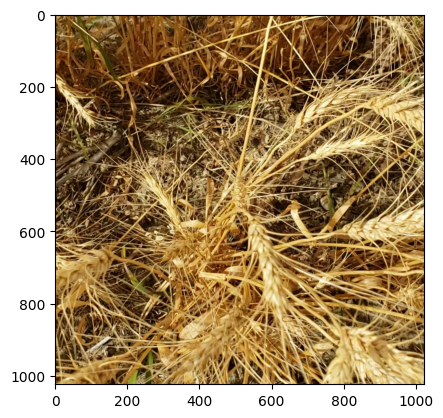

In [6]:
img = np.copy(
    plt.imread(
        "/Users/mauriciomurillogonzales/Documents/Datasets/WheatHead_data/data/frames/yfore1_000000.jpg"
    )
)
print(img.shape)
plt.imshow(img)

In [7]:
import torchvision.transforms as transforms

tr = transforms.Compose([transforms.ToTensor()])
img_t = tr(img).unsqueeze(dim=0)
print(img.shape)

(1024, 1024, 3)


In [8]:
enc = modelo.encode(img_t)
print(enc.shape)
dec = modelo.decode(enc)
print(dec.shape)

torch.Size([1, 4, 128, 128])


KeyboardInterrupt: 